<a href="https://colab.research.google.com/github/mimiflynn/covid-data/blob/master/covid_tracking_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# https://covidtracking.com/api

In [0]:
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import requests as request
import pandas as pd
import numpy as np

In [3]:
today = datetime.today()
print('Last run at:')
print(today)

Last run at:
2020-05-20 16:40:20.180824


In [0]:
current_states = request.get('https://covidtracking.com/api/v1/states/current.json')
current_states_daily = request.get('https://covidtracking.com/api/v1/states/daily.json')
current_us = request.get('https://covidtracking.com/api/v1/us/current.json')

In [0]:
states = pd.DataFrame.from_dict(current_states.json())
states_daily = pd.DataFrame.from_dict(current_states_daily.json())
us = pd.DataFrame.from_dict(current_us.json())

In [6]:
states_daily

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200519,AK,399.0,35981.0,NaN,16.0,NaN,NaN,NaN,NaN,NaN,348.0,B,5/19/2020 00:00,a6e64be0dcdb35ea2f5116f626fb9e26da9d98ba,2020-05-19T20:00:00Z,10.0,NaN,36380,36380,36380,02,0.0,0.0,769.0,0.0,769.0
1,20200519,AL,12376.0,145190.0,NaN,NaN,1453.0,NaN,517.0,NaN,306.0,NaN,B,5/18/2020 00:00,da768efac6b967b10afef712b89563d433bfa593,2020-05-19T20:00:00Z,504.0,1453.0,157566,157566,157566,01,15.0,37.0,153.0,290.0,443.0
2,20200519,AR,4923.0,88778.0,NaN,78.0,535.0,NaN,NaN,14.0,101.0,3739.0,A,5/19/2020 00:00,31b7e799d1d456ef327a06e12e0866aabb9dbad3,2020-05-19T20:00:00Z,102.0,535.0,93701,93701,93701,05,2.0,5.0,8352.0,110.0,8462.0
3,20200519,AS,0.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,5/19/2020 00:00,a6faa2e1ef283fcc8a86234ee19662c95c93290f,2020-05-19T20:00:00Z,0.0,NaN,124,124,124,60,0.0,0.0,19.0,0.0,19.0
4,20200519,AZ,14566.0,147005.0,NaN,792.0,1746.0,318.0,NaN,201.0,NaN,3693.0,A+,5/19/2020 00:00,93c83b05b7ed3f501b76fc8061f3ada8638d5a69,2020-05-19T20:00:00Z,704.0,1746.0,161571,161571,161571,04,18.0,29.0,4702.0,396.0,5098.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4212,20200126,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,609165307f5d60e495d9eaed0e0f3387c7bf8eca,2020-01-26T21:00:00Z,NaN,NaN,1,1,1,53,0.0,0.0,0.0,0.0,0.0
4213,20200125,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a8aa0b13ab29023a1508b6ab3eb78f0f5c9db331,2020-01-25T21:00:00Z,NaN,NaN,1,1,1,53,0.0,0.0,0.0,0.0,0.0
4214,20200124,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2a78947c0c03661f5387e9e6835cb9643765943a,2020-01-24T21:00:00Z,NaN,NaN,1,1,1,53,0.0,0.0,0.0,0.0,0.0
4215,20200123,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24102d7fccb764d4f7c6ee847522451af42a7e2b,2020-01-23T21:00:00Z,NaN,NaN,1,1,1,53,0.0,0.0,0.0,0.0,0.0


In [0]:
ny_daily = states_daily.loc[states_daily['state'] == 'NY']

In [8]:
ny_daily

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
37,20200519,NY,352845.0,1114894.0,NaN,5818.0,76168.0,1836.0,NaN,1481.0,NaN,61886.0,A,5/19/2020 00:00,84401a74545d19541faeed8beb09060d06a2d16d,2020-05-19T20:00:00Z,22843.0,76168.0,1467739,1467739,1467739,36,114.0,298.0,26708.0,1474.0,28182.0
93,20200518,NY,351371.0,1088186.0,NaN,5840.0,75870.0,1908.0,NaN,1538.0,NaN,61681.0,A,5/18/2020 00:00,46fa5352dd39fe8d99308c648d0ba385f1fd5f4c,2020-05-18T20:00:00Z,22729.0,75870.0,1439557,1439557,1439557,36,110.0,345.0,24911.0,1250.0,26161.0
149,20200517,NY,350121.0,1063275.0,NaN,5897.0,75525.0,1981.0,NaN,1601.0,NaN,61381.0,A,5/17/2020 00:00,dc9b0a8798647b7ae586f484f778baef168b1936,2020-05-17T20:00:00Z,22619.0,75525.0,1413396,1413396,1413396,36,141.0,362.0,32790.0,1889.0,34679.0
205,20200516,NY,348232.0,1030485.0,NaN,6220.0,75163.0,2077.0,NaN,1674.0,NaN,60796.0,A,5/16/2020 00:00,622d82ace7ccf79647d53e9afa44ad8b1dacdcd6,2020-05-16T20:00:00Z,22478.0,75163.0,1378717,1378717,1378717,36,174.0,412.0,38250.0,2419.0,40669.0
261,20200515,NY,345813.0,992235.0,NaN,6394.0,74751.0,2156.0,NaN,1774.0,NaN,60302.0,A,5/14/2020 00:00,9b7193c6e15e6af3ddd33905595f6175ab1b495d,2020-05-15T20:00:00Z,22304.0,74751.0,1338048,1338048,1338048,36,134.0,318.0,36529.0,2762.0,39291.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4027,20200308,NY,105.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d5e8dc460e38951e9c4ed83ea6116f3d1ef964e9,2020-03-08T20:00:00Z,NaN,NaN,197,197,197,36,0.0,0.0,0.0,29.0,29.0
4077,20200307,NY,76.0,92.0,236.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4cc604c6ed1a38fd0eac5f9526682d5eb68a6b96,2020-03-07T21:00:00Z,NaN,NaN,404,168,168,36,0.0,0.0,0.0,43.0,43.0
4117,20200306,NY,33.0,92.0,236.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a4269189c0f37537baee7e4fd80167aa7237fa7e,2020-03-06T21:00:00Z,NaN,NaN,361,125,125,36,0.0,0.0,16.0,11.0,27.0
4144,20200305,NY,22.0,76.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f5fa9d458bf8fb40664458e2710437c5e5a89aaf,2020-03-05T21:00:00Z,NaN,NaN,122,98,98,36,0.0,0.0,28.0,16.0,44.0


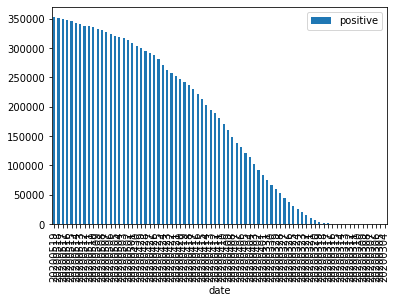

In [9]:
ny_daily.plot(x='date', y='positive', kind='bar')